In [1]:
import torch
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0)) 

ModuleNotFoundError: No module named 'torch'

In [3]:
pip install efficientnet_pytorch

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16465 sha256=819df6367c8811fa8e81b7de5b2f80445de205712ef376ba5dc3e38c0bac574a
  Stored in directory: c:\users\meta pc\appdata\local\pip\cache\wheels\8b\6f\9b\231a832f811ab6ebb1b32455b177ffc6b8b1cd8de19de70c09
Successfully built efficientnet_pytorch
Note: you may need to restart the kernel to use updated packages.


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet50
from efficientnet_pytorch import EfficientNet
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# thats just an empty comment

In [5]:
batch_size = 32
learning_rate = 0.001
num_epochs = 10

transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),  
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),  
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# train_size = int(0.2 * len(train_dataset))
# non_train_size = len(train_dataset) - train_size
# train_dataset , _ = random_split(train_dataset, [train_size, non_train_size])


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.model1 = EfficientNet.from_pretrained('efficientnet-b0')
        self.model2 = EfficientNet.from_pretrained('efficientnet-b2')
        self.model3 = EfficientNet.from_pretrained('efficientnet-b6')
        self.model4 = resnet50(pretrained=True)

        self.model1._fc = nn.Identity()
        self.model2._fc = nn.Identity()
        self.model3._fc = nn.Identity()
        self.model4.fc = nn.Identity()

        self.fc = nn.Linear(1280 + 1408 + 2304 + 2048, 10)  # مجموع خروجی‌های مدل‌ها

    def forward(self, x):
        b, c, h, w = x.size()
        x1 = x[:, :, :h//2, :w//2]
        x2 = x[:, :, :h//2, w//2:]
        x3 = x[:, :, h//2:, :w//2]
        x4 = x[:, :, h//2:, w//2:]

        f1 = self.model1(x1)
        f2 = self.model2(x2)
        f3 = self.model3(x3)
        f4 = self.model4(x4)

        combined_features = torch.cat((f1, f2, f3, f4), dim=1)
        out = self.fc(combined_features)
        return out


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomModel().to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

100%|██████████| 26421880/26421880 [02:46<00:00, 158935.43it/s]


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 78231.02it/s]


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:19<00:00, 227357.42it/s]


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]
Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to C:\Users\Meta Pc/.cache\torch\hub\checkpoints\efficientnet-b0-355c32eb.pth


Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 20.4M/20.4M [00:13<00:00, 1.60MB/s]
Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b2-8bb594d6.pth" to C:\Users\Meta Pc/.cache\torch\hub\checkpoints\efficientnet-b2-8bb594d6.pth


Loaded pretrained weights for efficientnet-b0


100%|██████████| 35.1M/35.1M [00:22<00:00, 1.67MB/s]


Loaded pretrained weights for efficientnet-b2


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b6-c76e70fd.pth" to C:\Users\Meta Pc/.cache\torch\hub\checkpoints\efficientnet-b6-c76e70fd.pth
100%|██████████| 165M/165M [03:38<00:00, 795kB/s]  
C:\Users\Meta Pc\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Meta Pc\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loaded pretrained weights for efficientnet-b6


Epoch [1/10], Train Loss: 0.3836735096951326, Test Loss: 0.31504278505048433, Train Accuracy: 0.8671, Test Accuracy: 0.8926
Epoch [2/10], Train Loss: 0.25175071780979635, Test Loss: 0.26766032978487664, Train Accuracy: 0.9108333333333334, Test Accuracy: 0.9126
Epoch [3/10], Train Loss: 0.22012682465116182, Test Loss: 0.2280678912437857, Train Accuracy: 0.9207333333333333, Test Accuracy: 0.9228
Epoch [4/10], Train Loss: 0.19567363158861797, Test Loss: 0.23979809059026524, Train Accuracy: 0.9302333333333334, Test Accuracy: 0.9186
Epoch [5/10], Train Loss: 0.17335013273109992, Test Loss: 0.21398007525160861, Train Accuracy: 0.9381666666666667, Test Accuracy: 0.9256
Epoch [6/10], Train Loss: 0.15198829740112027, Test Loss: 0.227671264120327, Train Accuracy: 0.9447333333333333, Test Accuracy: 0.9225
Epoch [7/10], Train Loss: 0.13440373690525692, Test Loss: 0.2299858502725276, Train Accuracy: 0.9518833333333333, Test Accuracy: 0.9251
Epoch [8/10], Train Loss: 0.11353994610967735, Test Loss: 

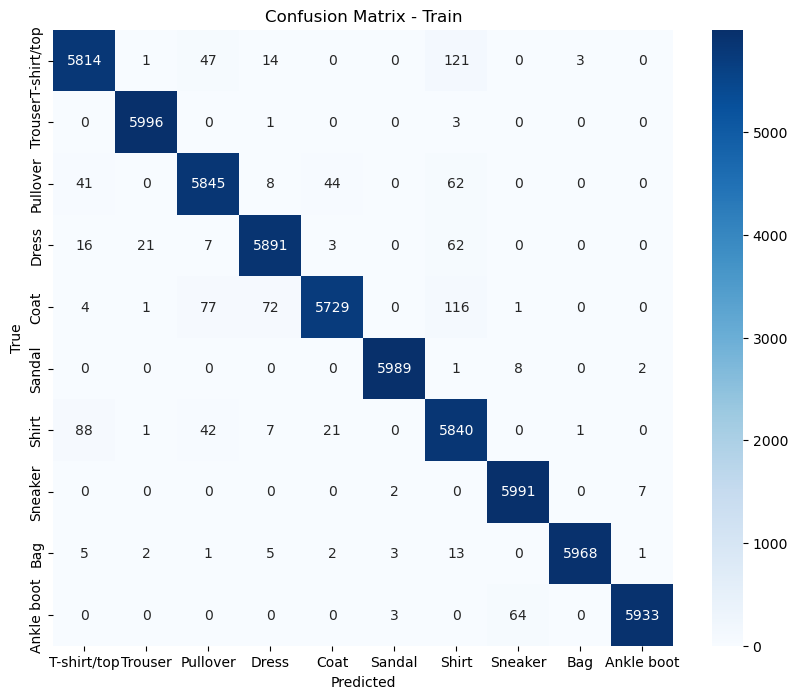

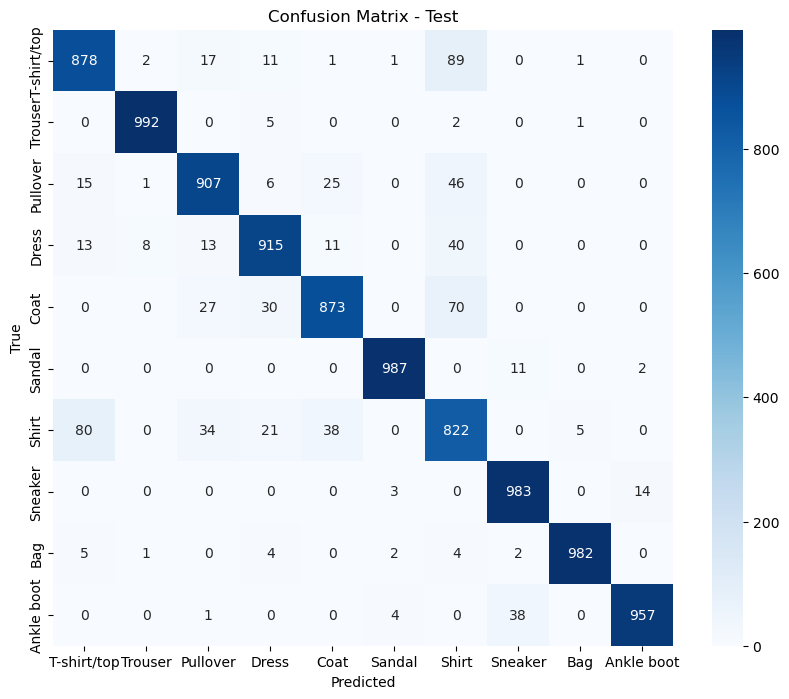

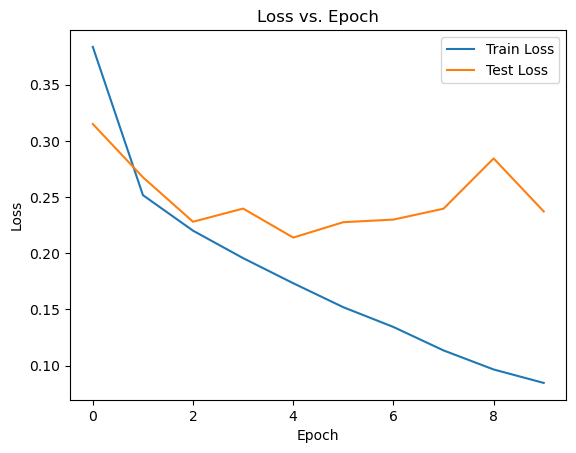

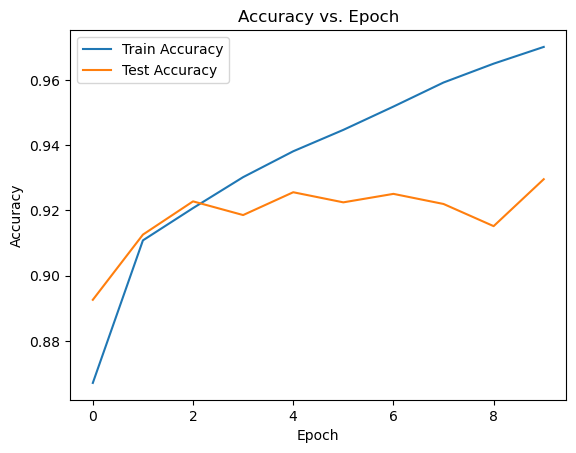

In [6]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct_train / total_train)

    model.eval()
    running_loss_test = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss_test += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_losses.append(running_loss_test / len(test_loader))
    test_accuracies.append(correct_test / total_test)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}, Train Accuracy: {train_accuracies[-1]}, Test Accuracy: {test_accuracies[-1]}')


all_labels_train = []
all_predictions_train = []
model.eval()
with torch.no_grad():
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels_train.extend(labels.cpu().numpy())
        all_predictions_train.extend(predicted.cpu().numpy())

train_accuracy = accuracy_score(all_labels_train, all_predictions_train)
train_f1 = f1_score(all_labels_train, all_predictions_train, average='weighted')
train_precision = precision_score(all_labels_train, all_predictions_train, average='weighted')
train_recall = recall_score(all_labels_train, all_predictions_train, average='weighted')

print(f'Train Accuracy: {train_accuracy * 100:.2f}%')
print(f'Train F1 Score: {train_f1:.2f}')
print(f'Train Precision: {train_precision:.2f}')
print(f'Train Recall: {train_recall:.2f}')


all_labels_test = []
all_predictions_test = []
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels_test.extend(labels.cpu().numpy())
        all_predictions_test.extend(predicted.cpu().numpy())

test_accuracy = accuracy_score(all_labels_test, all_predictions_test)
test_f1 = f1_score(all_labels_test, all_predictions_test, average='weighted')
test_precision = precision_score(all_labels_test, all_predictions_test, average='weighted')
test_recall = recall_score(all_labels_test, all_predictions_test, average='weighted')

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test F1 Score: {test_f1:.2f}')
print(f'Test Precision: {test_precision:.2f}')
print(f'Test Recall: {test_recall:.2f}')


conf_matrix_train = confusion_matrix(all_labels_train, all_predictions_train)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Train')
plt.show()


conf_matrix_test = confusion_matrix(all_labels_test, all_predictions_test)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test')
plt.show()


plt.figure()
plt.plot(range(num_epochs), train_losses, label='Train Loss')
plt.plot(range(num_epochs), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()


plt.figure()
plt.plot(range(num_epochs), train_accuracies, label='Train Accuracy')
plt.plot(range(num_epochs), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.show()


torch.save(model.state_dict(), 'fashion_mnist_custom_model.pth')